## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import random

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on = "Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"The number of mice: {combined_data.iloc[:, 0].nunique()}")

The number of mice: 249


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = combined_data.loc[combined_data.duplicated(["Mouse ID", "Timepoint"], keep = "first")].iloc[:, 0].unique()

# Print duplicate mouse IDs
if len(duplicate_mouse_ids) > 0:
    print(f"The duplicate mouse ID(s) : {duplicate_mouse_ids[0]}", end = '')
    for mouse_id in duplicate_mouse_ids[1:]:
        print(f", {mouse_id}", end = '')

The duplicate mouse ID(s) : g989

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
# Get the data have duplicate mouse IDs
duplicate_mice = combined_data.loc[combined_data.iloc[:, 0].isin(duplicate_mouse_ids)]
    
duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# Get the data doesn't have duplicate mouse IDs
clean_data = combined_data.loc[~combined_data.iloc[:, 0].isin(duplicate_mouse_ids)]

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"The number of mice: {clean_data.iloc[:, 0].nunique()}")

The number of mice: 248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat_sf = pd.DataFrame(index = sorted(clean_data.iloc[:, 1].unique()))

# This method is the most straighforward, creating multiple series and putting them all together at the end.

# Loop through the drugs
for drug in clean_data.iloc[:, 1].unique():
    # Get mean, median, variance, standard deviation, and SEM for each drug
    summary_stat_sf.loc[drug, "mean"] = clean_data.loc[clean_data.iloc[: ,1] == drug].iloc[:, 6].mean()
    summary_stat_sf.loc[drug, "median"] = clean_data.loc[clean_data.iloc[: ,1] == drug].iloc[:, 6].median()
    summary_stat_sf.loc[drug, "variance"] = clean_data.loc[clean_data.iloc[: ,1] == drug].iloc[:, 6].var(ddof = 0)
    summary_stat_sf.loc[drug, "StdDevi"] = clean_data.loc[clean_data.iloc[: ,1] == drug].iloc[:, 6].std(ddof = 0)
    summary_stat_sf.loc[drug, "SEM"] = clean_data.loc[clean_data.iloc[: ,1] == drug].iloc[:, 6].sem(ddof = 0)

summary_stat_sf

,mean,median,variance,StdDevi,SEM
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.514977


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary_stat_gr = pd.DataFrame(index = sorted(clean_data.iloc[:, 1].unique()))

# Create group data by drug
group_data = clean_data.iloc[:, [1,6]].groupby("Drug Regimen")

# This method produces everything in a single groupby function
summary_stat_gr["mean"] = group_data.mean()
summary_stat_gr["median"] = group_data.median()
summary_stat_gr["variance"] = group_data.var(ddof = 0)
summary_stat_gr["StdDevi"] = group_data.std(ddof = 0)
summary_stat_gr["SEM"] = group_data.sem(ddof = 0)

summary_stat_gr

,mean,median,variance,StdDevi,SEM
Capomulin,40.675741,41.557809,24.839296,4.983904,0.328629
Ceftamin,52.591172,51.776157,39.069446,6.250556,0.468499
Infubinol,52.884795,51.820584,42.886388,6.548770,0.490851
Ketapril,55.235638,53.698743,68.188930,8.257659,0.602252
Naftisol,54.331565,52.509285,65.817708,8.112811,0.594860
Placebo,54.033581,52.288934,60.830138,7.799368,0.579722
Propriva,52.320930,50.446266,43.555716,6.599675,0.542490
Ramicane,40.216745,40.673236,23.383692,4.835669,0.320250
Stelasyn,54.233149,52.431737,59.122106,7.689090,0.571526
Zoniferol,53.236507,51.818479,48.266689,6.947423,0.514977


## Bar and Pie Charts

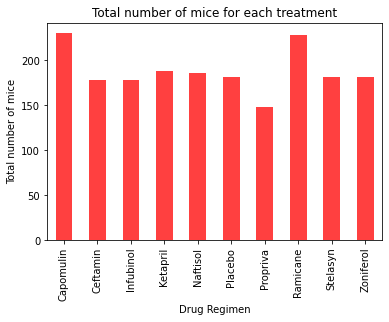

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
# Create a dataframe grouped by drug, which has the total number of mice for each treatment
number_of_mice = clean_data.iloc[:, :2].groupby("Drug Regimen").count()

# Generate a bar plot using pandas dataframe, and set Y label
tot_bar = number_of_mice.plot(kind = "bar", title = "Total number of mice for each treatment", legend = False, color = "r",
                              alpha = 0.75, width = 0.5)
tot_bar.set_ylabel("Total number of mice")
plt.show()

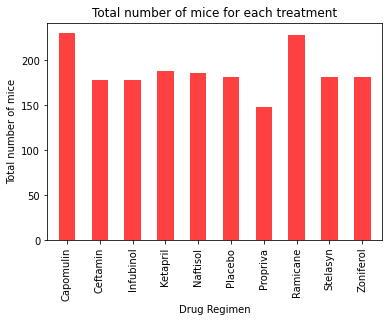

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
# Generate a bar plot using pyplot, and set X, Y labels, title, etc.
plt.bar(number_of_mice.index, number_of_mice.iloc[:, 0], color = "r", alpha = 0.75, width = 0.5)
plt.xticks(rotation = "vertical")
plt.title("Total number of mice for each treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Total number of mice")
plt.xlim(-0.6, len(number_of_mice.index)-0.4)
plt.show()

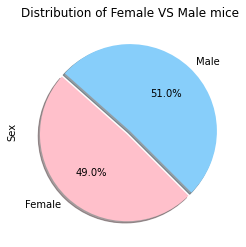

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_dist = pd.DataFrame(clean_data.iloc[:, 2].value_counts(), columns = ["Sex"])
gender_pie = gender_dist.plot(kind = "pie", y = gender_dist.columns[0], legend = False, title = "Distribution of Female VS Male mice",
                             autopct = "%1.1f%%", shadow = True, explode = (0, 0.05), colors = ["lightskyblue", "pink"], startangle = 315)

plt.show()

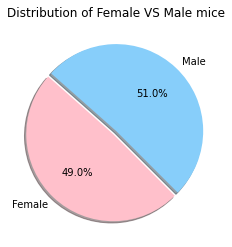

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_dist.iloc[:, 0], labels = gender_dist.index, autopct = "%1.1f%%", shadow = True, explode = (0, 0.05),
        colors = ["lightskyblue", "pink"], startangle = 315)
plt.title("Distribution of Female VS Male mice")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ramicane"]

# Get data from the merged dataframe, which have drugs I need
final_tumor = combined_data.loc[combined_data.iloc[:, 1].isin(drugs)]

# Sort the data by timepoint, and remove data except for the greatest timepoint
final_tumor = final_tumor.sort_values(by = "Timepoint")
final_tumor = final_tumor.drop_duplicates(["Mouse ID"], keep = "last")

final_tumor

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1583,u153,Ceftamin,Female,11,25,0,45.000000,0
1551,t573,Ceftamin,Female,15,27,0,45.000000,0
594,b447,Ceftamin,Male,2,30,0,45.000000,0
1743,x226,Ceftamin,Male,23,28,0,45.000000,0
1205,m756,Infubinol,Male,19,30,5,47.010364,1
...,...,...,...,...,...,...,...,...
350,v923,Capomulin,Female,19,21,45,40.658124,2
144,m957,Capomulin,Female,3,19,45,33.329098,1
337,j119,Capomulin,Female,7,23,45,38.125164,1
59,s508,Ramicane,Male,1,17,45,30.276232,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = sorted([treatment for treatment in final_tumor.iloc[:, 1].unique()])

# Create empty list to fill with tumor vol data (for plotting)
vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

# Create a dataframe having quantiles for each treatment
tumor_vol_df = final_tumor.iloc[:, [1, 6]].groupby("Drug Regimen").quantile([.25, .5, .75])
# Create a summary table to show quantiles
quartiles_df = pd.DataFrame(index = sorted(final_tumor.iloc[:, 1].unique()))

# Loop thorugh the treatments
for treatment in treatments:
    # Appending tumor volumes into the list for plotting
    vol_data.append(final_tumor.loc[final_tumor.iloc[:, 1] == treatment].iloc[:, 6])
    
    # Calculate quartiles, and get outliers
    lowerq = tumor_vol_df.loc[(treatment, 0.25), "Tumor Volume (mm3)"]
    med = tumor_vol_df.loc[(treatment, 0.5), "Tumor Volume (mm3)"]
    upperq = tumor_vol_df.loc[(treatment, 0.75), "Tumor Volume (mm3)"]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = [vol for vol in vol_data[-1] if (vol > upper_bound) or (vol < lower_bound)]
    
    # Put quartiles and outliers into the dataframe
    quartiles_df.loc[treatment, "Lower Quartiles"] = round(lowerq, 2)
    quartiles_df.loc[treatment, "Upper Quartiles"] = round(upperq, 2)
    quartiles_df.loc[treatment, "IQR"] = round(iqr, 2)
    quartiles_df.loc[treatment, "Median"] = round(med, 2)
    quartiles_df.loc[treatment, "Lower Bounds"] = round(lower_bound, 2)
    quartiles_df.loc[treatment, "Upper Bounds"] = round(upper_bound, 2)
    
    # If there are outliers
    if len(outliers) > 0:
        # Put the first outlier into the dataframe
        quartiles_df.loc[treatment, "Outliers"] = str(round(outliers[0], 2))
        for outlier in outliers[1:]:
            # Store outliers from the second to the last, put a comma between outliers
            quartiles_df.loc[treatment, "Outliers"] = quartiles_df.loc[treatment, "Outliers"] + ", " + str(round(outlier, 2))

quartiles_df

,Lower Quartiles,Upper Quartiles,IQR,Median,Lower Bounds,Upper Bounds,Outliers
Capomulin,32.38,40.16,7.78,38.13,20.70,51.83,NaN
Ceftamin,48.72,64.30,15.58,59.85,25.36,87.67,NaN
Infubinol,54.05,65.53,11.48,60.17,36.83,82.74,36.32
Ramicane,31.56,40.66,9.10,36.56,17.91,54.31,NaN


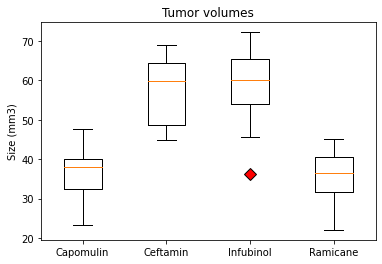

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
flierprops = dict(marker= "D", markerfacecolor = "red", markersize = 8)

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor volumes')
ax1.set_ylabel('Size (mm3)')
ax1.boxplot(vol_data, flierprops = flierprops)
ax1.set_xticklabels(treatments)
plt.show()

## Line and Scatter Plots

In [16]:
# Seed for a random value
random.seed()

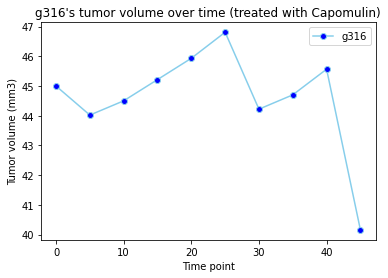

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
treatment = "Capomulin"
# Choose a mouse randomly
mouse_ids = clean_data.loc[clean_data.iloc[:, 1] == treatment].iloc[:, 0].unique()
mouse_id = mouse_ids[random.randint(0, len(mouse_ids) - 1)]

# Set X axis and Y axis, generate a line plot
x_axis = clean_data.loc[clean_data.iloc[:, 0] == mouse_id].iloc[:, 5]
y_axis = clean_data.loc[clean_data.iloc[:, 0] == mouse_id].iloc[:, 6]

plt.plot(x_axis, y_axis, marker = "o", color = "skyblue", markerfacecolor = "blue", label = mouse_id)
plt.xlabel("Time point")
plt.ylabel("Tumor volume (mm3)")
plt.legend(loc = "best")
plt.title(mouse_id + "'s tumor volume over time (treated with " + treatment + ")")
plt.show()

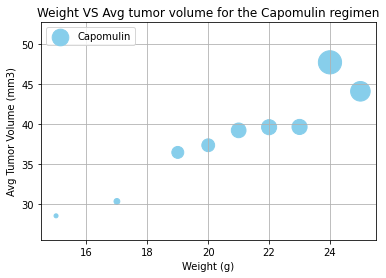

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Create a dataframe and get weights and avg tumor volumes from the final tumor volumes to use for plotting
weight_vs_vol = final_tumor.loc[final_tumor.iloc[:, 1] == treatment].iloc[:, [4, 6]].groupby("Weight (g)").mean().reset_index()
size = weight_vs_vol.iloc[:, 1]
# Generate a scatter plot
weight_vs_vol.plot(kind = "scatter", x = "Weight (g)", y = "Tumor Volume (mm3)", s = (size - (size.min()) + 4) ** 2, c = "skyblue",
                   label = treatment)
plt.title("Weight VS Avg tumor volume for the " + treatment + " regimen")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.ylim(size.min() - 3, size.max() + 5)
plt.legend(loc = 2)
plt.grid()
plt.show()

## Correlation and Regression

In [19]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = weight_vs_vol.iloc[:, 0]
y_values = weight_vs_vol.iloc[:, 1]
print(f"The correlation coefficient between weight and avg tumor volume is {round(st.pearsonr(x_values, y_values)[0], 2)}")

The correlation coefficient between weight and avg tumor volume is 0.95


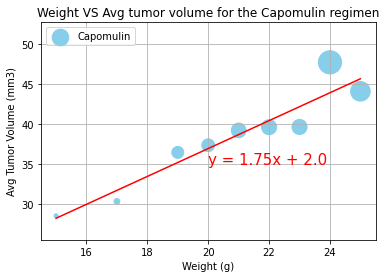

In [20]:
# Prepare data for linear regression model
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# Set annotation
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Generate a scatter plot
plt.scatter(x_values, y_values, s = (size - (size.min()) + 4) ** 2, c = "skyblue", label = treatment)
# Draw a linear regression model
plt.plot(x_values, regress_values, "r-")
# Put annotation
plt.annotate(line_eq, (20, 35), fontsize = 15, color = "red")
plt.xlabel("Weight (g)")
plt.ylabel("Avg Tumor Volume (mm3)")
plt.title("Weight VS Avg tumor volume for the " + treatment + " regimen")
plt.ylim(size.min() - 3, size.max() + 5)
plt.legend(loc = 2)
plt.grid()
plt.show()

## Result

* I can say there is strong correlation between weights and avg tumor volumes because the correlation coefficient value is 0.95


* Among the four treatments, Capomulin and Ramicane are likely to work on tumors more than the others.


* I suppose changed tumor volumes between before and after each treatment would show a more accurate result if each treatment works or not.